In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data = data[['Date', 'Anomoulous melting area']]
print(data)


import torch

device = None
if torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)


from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Anomoulous melting area(t-{i})'] = df['Anomoulous melting area'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 30
shifted_df = prepare_dataframe_for_lstm(data, lookback)
print(shifted_df)


shifted_df_as_np = shifted_df.to_numpy()

print(shifted_df_as_np)




from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

print(shifted_df_as_np)


X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

print(X.shape, y.shape)


X = dc(np.flip(X, axis=1))
print(X)

          Date  Anomoulous melting area
0     20000102                     1354
1     20000103                     1346
2     20000104                      750
3     20000105                     1768
4     20000106                      921
...        ...                      ...
8373  20221227                      694
8374  20221228                      847
8375  20221229                     1345
8376  20221230                      808
8377  20221231                      479

[8378 rows x 2 columns]
mps
          Anomoulous melting area  Anomoulous melting area(t-1)  \
Date                                                              
20000201                      356                         465.0   
20000202                      503                         356.0   
20000203                      951                         503.0   
20000204                      923                         951.0   
20000205                      723                         923.0   
...                   

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data = data[['Date', 'Anomoulous melting area']]
print(data)


df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['year'] = df['date'].dt.year

# Group the data by year
grouped = df.groupby('year')

# Set up a unique color for each year
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b','g']

# Create a plot for each year
for year, group in grouped:
    plt.plot(group['date'], group['Anomoulous melting area'], label=str(year), color=colors[year - df['year'].min()])

# Customize the plot
plt.xlabel('Year',fontsize = 60)
plt.ylabel('Number of anomalous melting grids', fontsize = 60)
plt.title('Anomalous melting grids by Year', fontsize=60)

# Rotate the x-axis date labels for better readability
plt.xticks(rotation=45, fontsize=60)  # Adjust the fontsize as needed
plt.yticks(fontsize=60)  # Adjust the fontsize as needed

# Create a larger figure
fig = plt.gcf()
fig.set_size_inches(85,16)  # Adjust the size as needed
fig.set_dpi(300)

# Customize the legend with a bold fontweight
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(grouped))
for text in legend.get_texts():
    text.set_fontsize(60)





          Date  Anomoulous melting area
0     20000102                     1354
1     20000103                     1346
2     20000104                      750
3     20000105                     1768
4     20000106                      921
...        ...                      ...
8373  20221227                      694
8374  20221228                      847
8375  20221229                     1345
8376  20221230                      808
8377  20221231                      479

[8378 rows x 2 columns]


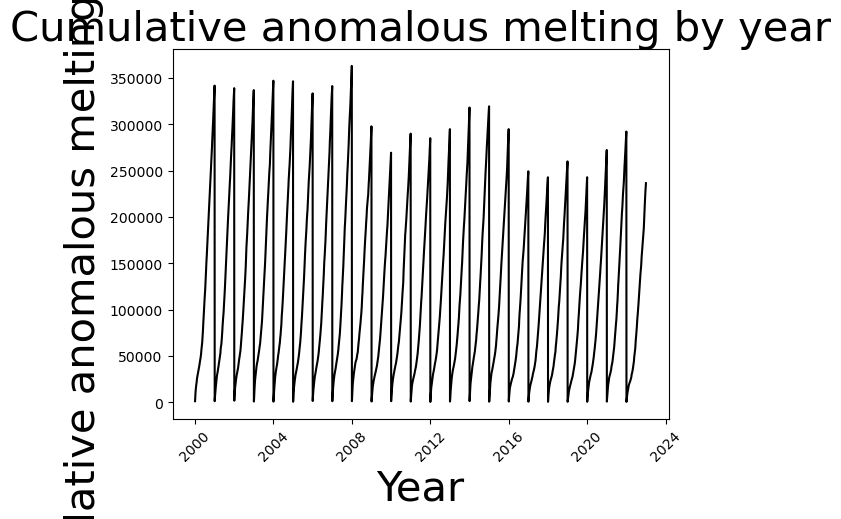

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')

# Assuming your data contains a 'Date' column and an 'Anomoulous melting area' column

# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Group the data by year and calculate the cumulative sum
data['Cumulative Melting'] = data.groupby(data['Date'].dt.year)['Anomoulous melting area'].cumsum()

# Create a plot
plt.plot(data['Date'], data['Cumulative Melting'], label='Cumulative Melting', color='black')

# Customize the plot

font_point = 30
plt.xlabel('Year', fontsize=font_point)
plt.ylabel('Cumulative anomalous melting of grids', fontsize=font_point)
plt.title('Cumulative anomalous melting by year', fontsize=font_point)

# Rotate the x-axis date labels for better readability
plt.xticks(rotation=45)


plt.show()


['2000-01-02T00:00:00.000000000' '2000-01-03T00:00:00.000000000'
 '2000-01-04T00:00:00.000000000' ... '2022-12-29T00:00:00.000000000'
 '2022-12-30T00:00:00.000000000' '2022-12-31T00:00:00.000000000']


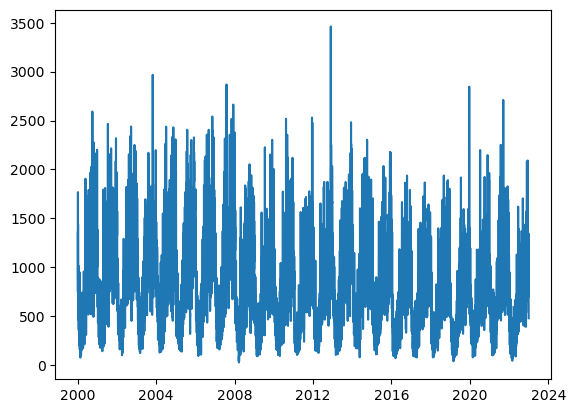

In [4]:
#data['Date'] = pd.to_datetime(data['Date'])

print(data['Date'].values)

plt.plot(data['Date'], data['Anomoulous melting area'])

In [5]:
shifted_df_as_np.shape

(8348, 31)

In [6]:
split_index = 5827

split_index

5827

In [7]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5827, 30), (2521, 30), (5827,), (2521,))

In [8]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5827, 30, 1), (2521, 30, 1), (5827, 1), (2521, 1))

In [9]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([5827, 30, 1]),
 torch.Size([2521, 30, 1]),
 torch.Size([5827, 1]),
 torch.Size([2521, 1]))

In [10]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [11]:
train_dataset

In [12]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 30, 1]) torch.Size([16, 1])


In [14]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1,4,1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [15]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train_one_epoch(epoch):
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [16]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [17]:


for epoch in range(num_epochs):
    train_one_epoch(epoch)
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.491
Batch 200, Loss: 0.068
Batch 300, Loss: 0.040

Val Loss: 0.027
***************************************************

Epoch: 2
Batch 100, Loss: 0.035
Batch 200, Loss: 0.036
Batch 300, Loss: 0.032

Val Loss: 0.024
***************************************************

Epoch: 3
Batch 100, Loss: 0.035
Batch 200, Loss: 0.035
Batch 300, Loss: 0.030

Val Loss: 0.023
***************************************************

Epoch: 4
Batch 100, Loss: 0.032
Batch 200, Loss: 0.033
Batch 300, Loss: 0.031

Val Loss: 0.023
***************************************************

Epoch: 5
Batch 100, Loss: 0.031
Batch 200, Loss: 0.031
Batch 300, Loss: 0.033

Val Loss: 0.022
***************************************************

Epoch: 6
Batch 100, Loss: 0.030
Batch 200, Loss: 0.029
Batch 300, Loss: 0.034

Val Loss: 0.022
***************************************************

Epoch: 7
Batch 100, Loss: 0.031
Batch 200, Loss: 0.034
Batch 300, Loss: 0.028

Val Loss: 0.022
*****************

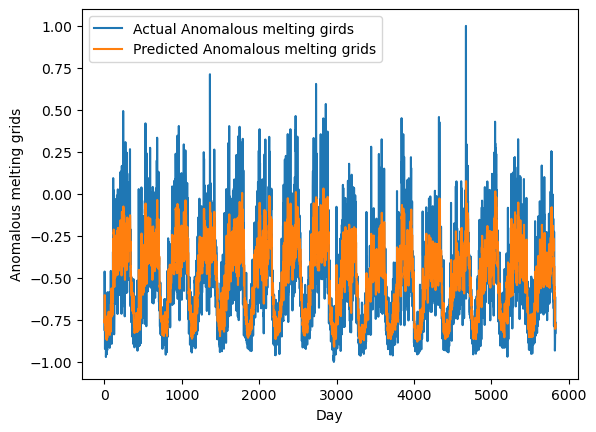

In [18]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Anomalous melting girds')
plt.plot(predicted, label='Predicted Anomalous melting grids')
plt.xlabel('Day')
plt.ylabel('Anomalous melting grids')
plt.legend()
plt.show()


In [19]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([452.30186355, 424.60068655, 465.21616709, ..., 393.66806728,
       418.77864432, 385.87190312])

In [20]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([355.99994954, 502.99996403, 950.99998136, ..., 436.000002  ,
       314.99996361, 682.99997967])

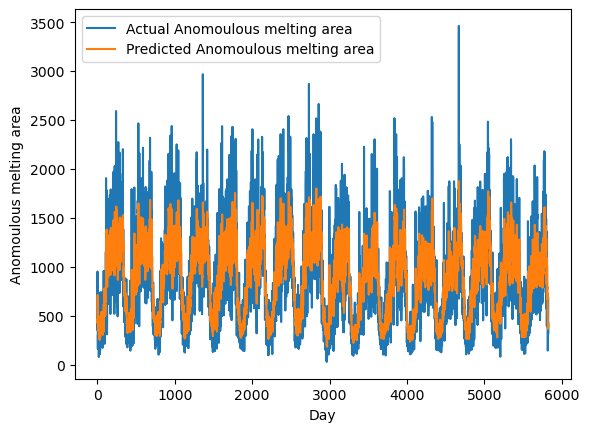

In [21]:
plt.plot(new_y_train, label='Actual Anomoulous melting area')
plt.plot(train_predictions, label='Predicted Anomoulous melting area')
plt.xlabel('Day')
plt.ylabel('Anomoulous melting area')
plt.legend()
plt.show()


In [22]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 501.93069917,  407.85095197,  367.36609679, ...,  956.00617808,
       1124.22800329,  985.83912832])

In [23]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 286.00000602,  238.99995473,  349.00002685, ..., 1344.99999911,
        807.99995926,  479.00000972])

5827   2015-12-31
5828   2016-01-02
5829   2016-01-03
5830   2016-01-04
5831   2016-01-05
          ...    
8373   2022-12-27
8374   2022-12-28
8375   2022-12-29
8376   2022-12-30
8377   2022-12-31
Name: Date, Length: 2551, dtype: datetime64[ns]


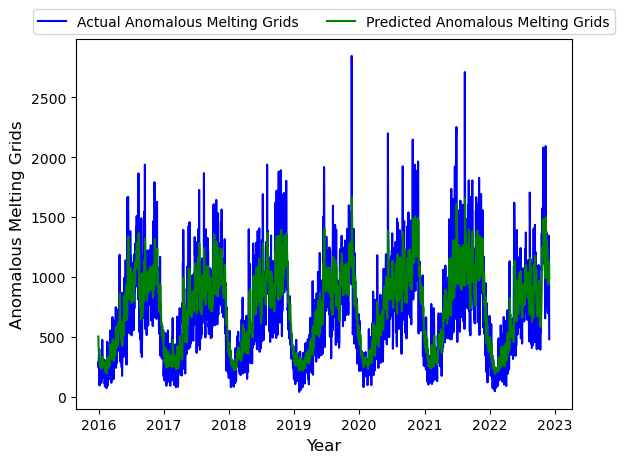

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data1 = {}

data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')


print(data1['Date'])
# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis

fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(new_y_test)], new_y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(test_predictions)], test_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
#ax.legend(loc='upper center', fontsize=12)  # Legend at the upper center
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))

In [25]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5827, 30), (2521, 30), (5827,), (2521,))

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, y_train, X_test, y_test are your training and testing data
# Make sure your data is in the format suitable for these models

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# ElasticNet
elasticnet_model = ElasticNet(alpha = 0.1)
elasticnet_model.fit(X_train, y_train)
elasticnet_predictions = elasticnet_model.predict(X_test)

# Calculate performance metrics for SVR
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
svr_mape = mean_absolute_percentage_error(y_test, svr_predictions)

# Calculate performance metrics for ElasticNet
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)
elasticnet_rmse = np.sqrt(elasticnet_mse)
elasticnet_mae = mean_absolute_error(y_test, elasticnet_predictions)
elasticnet_r2 = r2_score(y_test, elasticnet_predictions)
elasticnet_mape = mean_absolute_percentage_error(y_test, elasticnet_predictions)


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Calculate metrics for each model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
linear_mape = np.mean(np.abs((y_test - linear_predictions) / y_test)) * 100

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mape = np.mean(np.abs((y_test - lasso_predictions) / y_test)) * 100

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mape = np.mean(np.abs((y_test - ridge_predictions) / y_test)) * 100

# Print the results
print("Linear Regression Metrics:")
print(f"MSE: {linear_mse}")
print(f"RMSE: {linear_rmse}")
print(f"MAE: {linear_mae}")
print(f"R-squared: {linear_r2}")
print(f"MAPE: {linear_mape}%\n")

print("Lasso Regression Metrics:")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")
print(f"MAE: {lasso_mae}")
print(f"R-squared: {lasso_r2}")
print(f"MAPE: {lasso_mape}%\n")

print("Ridge Regression Metrics:")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"MAE: {ridge_mae}")
print(f"R-squared: {ridge_r2}")
print(f"MAPE: {ridge_mape}%")


# Display or use the calculated metrics as needed
print("SVR Metrics:")
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)
print("MAE:", svr_mae)
print("R-squared:", svr_r2)
print("MAPE:", svr_mape)

print("\nElasticNet Metrics:")
print("MSE:", elasticnet_mse)
print("RMSE:", elasticnet_rmse)
print("MAE:", elasticnet_mae)
print("R-squared:", elasticnet_r2)
print("MAPE:", elasticnet_mape)


Linear Regression Metrics:
MSE: 0.021166997362242496
RMSE: 0.14548882212129732
MAE: 0.10884351848085591
R-squared: 0.6107865415306918
MAPE: 169.5626045026557%

Lasso Regression Metrics:
MSE: 0.023557954256508022
RMSE: 0.15348600671236456
MAE: 0.12145676686994376
R-squared: 0.5668222235907225
MAPE: 185.07382485809535%

Ridge Regression Metrics:
MSE: 0.021166941709236737
RMSE: 0.14548863085903563
MAE: 0.10884432213110842
R-squared: 0.6107875648642556
MAPE: 169.56679833643778%
SVR Metrics:
MSE: 0.023406062240055214
RMSE: 0.15299039917607646
MAE: 0.11534357578538094
R-squared: 0.5696151760357835
MAPE: 1.6637579709958739

ElasticNet Metrics:
MSE: 0.06009376429094825
RMSE: 0.24514029511883242
MAE: 0.2051812771424296
R-squared: -0.10498912206797062
MAPE: 2.353489587276909


5827   2015-12-31
5828   2016-01-02
5829   2016-01-03
5830   2016-01-04
5831   2016-01-05
          ...    
8373   2022-12-27
8374   2022-12-28
8375   2022-12-29
8376   2022-12-30
8377   2022-12-31
Name: Date, Length: 2551, dtype: datetime64[ns]


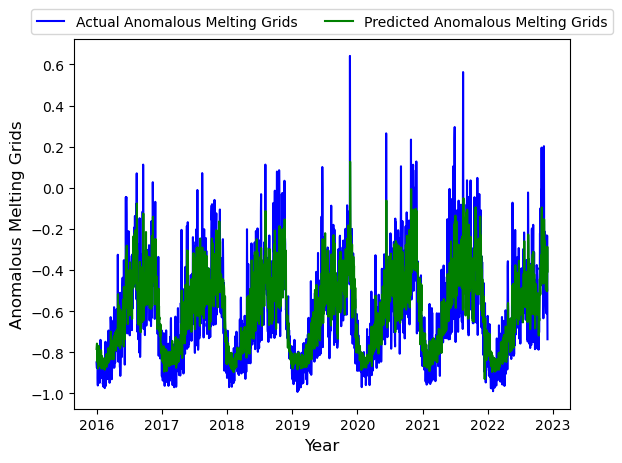

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data1 = {}

data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')


print(data1['Date'])
# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis

fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(y_test)], y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(svr_predictions)], svr_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
#ax.legend(loc='upper center', fontsize=12)  # Legend at the upper center
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))
# # Format the x-axis to display years
# date_format = mpl.dates.DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_format)

# # Rotate the x-axis year labels for better readability
# fig.autofmt_xdate()

# # Show the plot
# plt.show()

5827   2015-12-31
5828   2016-01-02
5829   2016-01-03
5830   2016-01-04
5831   2016-01-05
          ...    
8373   2022-12-27
8374   2022-12-28
8375   2022-12-29
8376   2022-12-30
8377   2022-12-31
Name: Date, Length: 2551, dtype: datetime64[ns]


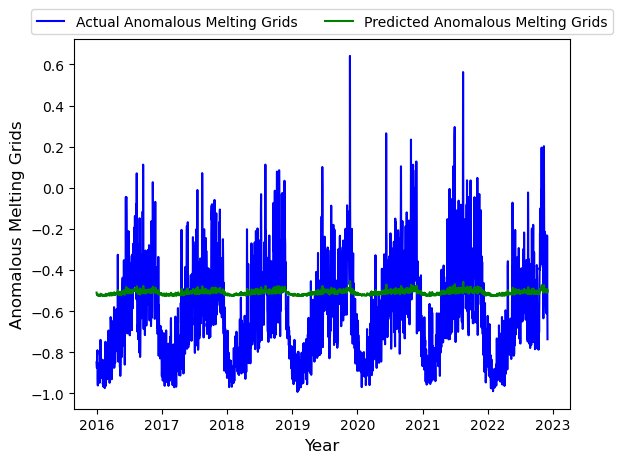

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data1 = {}

data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')


print(data1['Date'])
# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis

fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(y_test)], y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(elasticnet_predictions)], elasticnet_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
#ax.legend(loc='upper center', fontsize=12)  # Legend at the upper center
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))
# # Format the x-axis to display years
# date_format = mpl.dates.DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_format)

# # Rotate the x-axis year labels for better readability
# fig.autofmt_xdate()

# # Show the plot
# plt.show()

5827   2015-12-31
5828   2016-01-02
5829   2016-01-03
5830   2016-01-04
5831   2016-01-05
          ...    
8373   2022-12-27
8374   2022-12-28
8375   2022-12-29
8376   2022-12-30
8377   2022-12-31
Name: Date, Length: 2551, dtype: datetime64[ns]


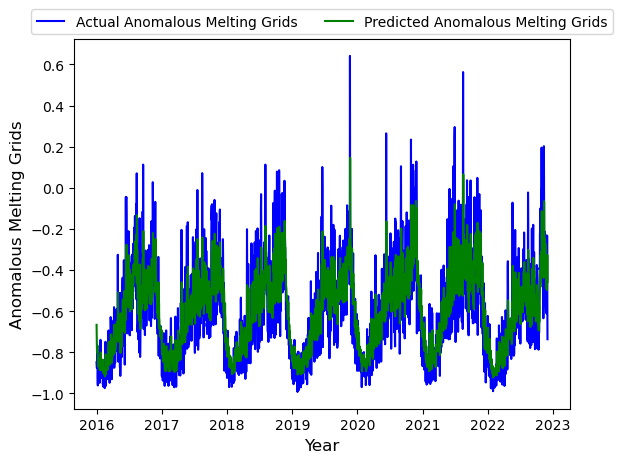

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data1 = {}

data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')


print(data1['Date'])
# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis

fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(y_test)], y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(linear_predictions)], linear_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
#ax.legend(loc='upper center', fontsize=12)  # Legend at the upper center
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))
# # Format the x-axis to display years
# date_format = mpl.dates.DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_format)

# # Rotate the x-axis year labels for better readability
# fig.autofmt_xdate()

# # Show the plot
# plt.show()

5827   2015-12-31
5828   2016-01-02
5829   2016-01-03
5830   2016-01-04
5831   2016-01-05
          ...    
8373   2022-12-27
8374   2022-12-28
8375   2022-12-29
8376   2022-12-30
8377   2022-12-31
Name: Date, Length: 2551, dtype: datetime64[ns]


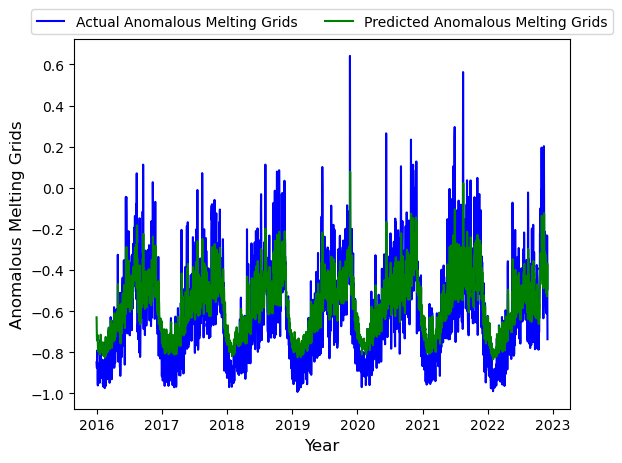

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data1 = {}

data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')


print(data1['Date'])
# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis

fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(y_test)], y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(lasso_predictions)], lasso_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
#ax.legend(loc='upper center', fontsize=12)  # Legend at the upper center
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))
# # Format the x-axis to display years
# date_format = mpl.dates.DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_format)

# # Rotate the x-axis year labels for better readability
# fig.autofmt_xdate()

# # Show the plot
# plt.show()


5827   2015-12-31
5828   2016-01-02
5829   2016-01-03
5830   2016-01-04
5831   2016-01-05
          ...    
8373   2022-12-27
8374   2022-12-28
8375   2022-12-29
8376   2022-12-30
8377   2022-12-31
Name: Date, Length: 2551, dtype: datetime64[ns]


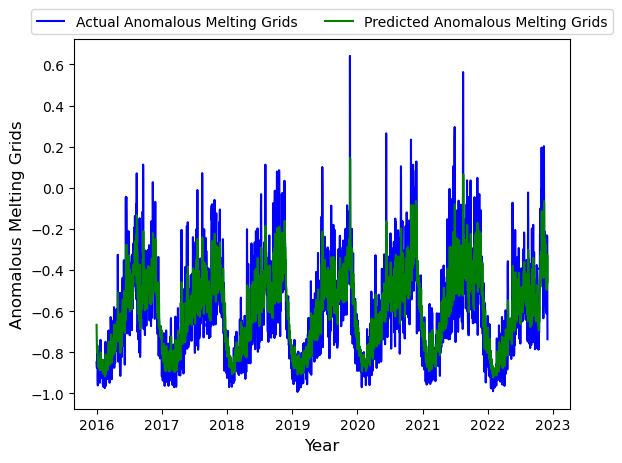

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')


data1 = {}

data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')


print(data1['Date'])
# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis

fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(y_test)], y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(ridge_predictions)], ridge_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
#ax.legend(loc='upper center', fontsize=12)  # Legend at the upper center
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))
# # Format the x-axis to display years
# date_format = mpl.dates.DateFormatter("%Y")
# ax.xaxis.set_major_formatter(date_format)

# # Rotate the x-axis year labels for better readability
# fig.autofmt_xdate()

# # Show the plot
# plt.show()

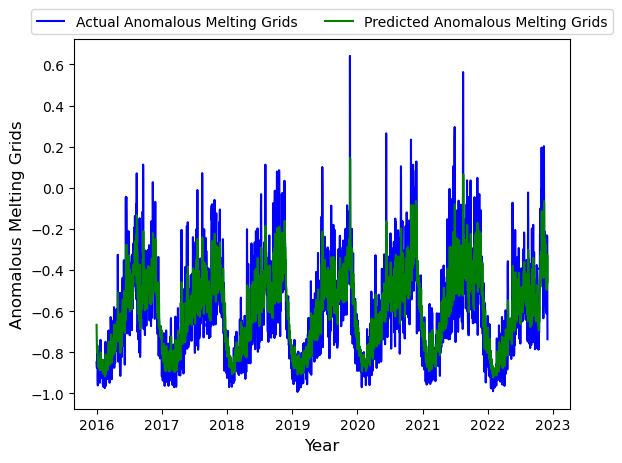

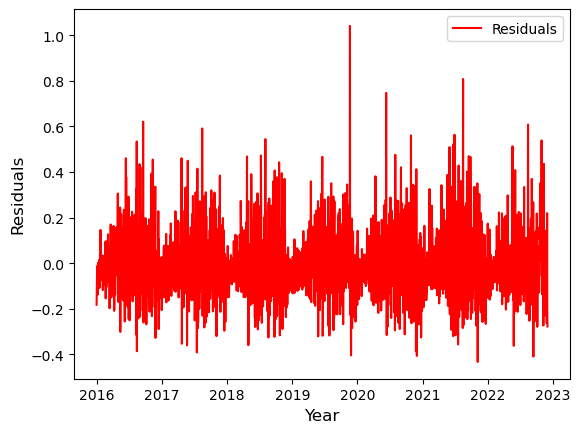

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')

data1 = {}
data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')

# Extract the year from the 'Date' column
data1['Year'] = data1['Date'].dt.year

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the actual and predicted values
ax.plot(data1['Date'][:len(y_test)], y_test, label='Actual Anomalous Melting Grids', color='blue')
ax.plot(data1['Date'][:len(ridge_predictions)], ridge_predictions, label='Predicted Anomalous Melting Grids', color='green')

# Calculate residuals (errors)
residuals = y_test - ridge_predictions

# Plot the residuals
fig, ax_res = plt.subplots()
ax_res.plot(data1['Date'][:len(residuals)], residuals, label='Residuals', color='red')
ax_res.set_xlabel('Year', fontsize=12)
ax_res.set_ylabel('Residuals', fontsize=12)
ax_res.legend()

# Customize the plot
ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))

# Show the plots
plt.show()


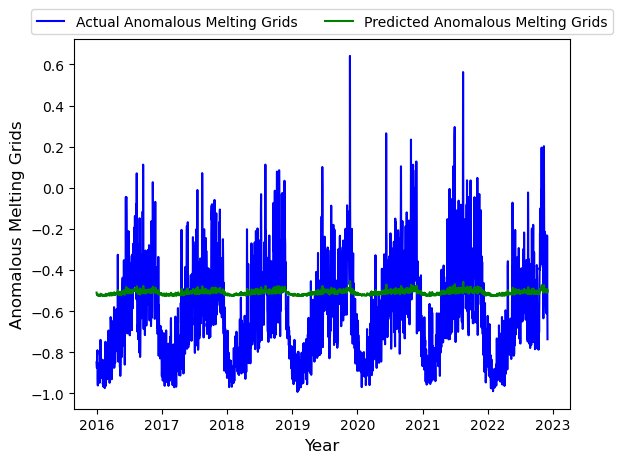

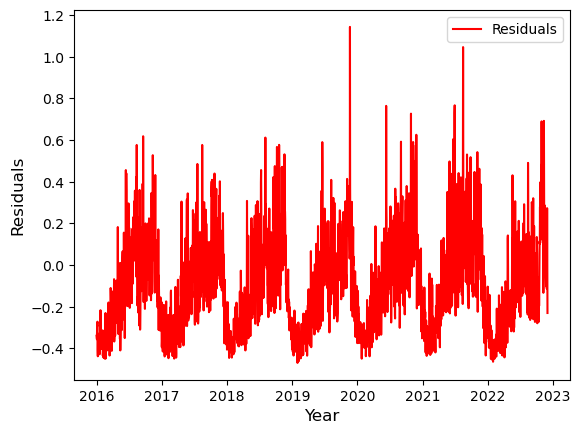

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your own data)
def plot_with_residuals(_predictions):
    data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')

    data1 = {}
    data1['Date'] = pd.to_datetime(data['Date'][split_index:], format='%Y%m%d')

    # Extract the year from the 'Date' column
    data1['Year'] = data1['Date'].dt.year

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the actual and predicted values
    ax.plot(data1['Date'][:len(y_test)], y_test, label='Actual Anomalous Melting Grids', color='blue')
    ax.plot(data1['Date'][:len(_predictions)], _predictions, label='Predicted Anomalous Melting Grids', color='green')

    # Calculate residuals (errors)
    residuals = y_test - _predictions

    # Plot the residuals
    fig, ax_res = plt.subplots()
    ax_res.plot(data1['Date'][:len(residuals)], residuals, label='Residuals', color='red')
    ax_res.set_xlabel('Year', fontsize=12)
    ax_res.set_ylabel('Residuals', fontsize=12)
    ax_res.legend()

    # Customize the plot
    ax.set_xlabel('Year', fontsize=12)  # X-axis label as 'Year'
    ax.set_ylabel('Anomalous Melting Grids', fontsize=12)  # Y-axis label
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(grouped))

    # Show the plots
    plt.show()



plot_with_residuals(elasticnet_predictions)


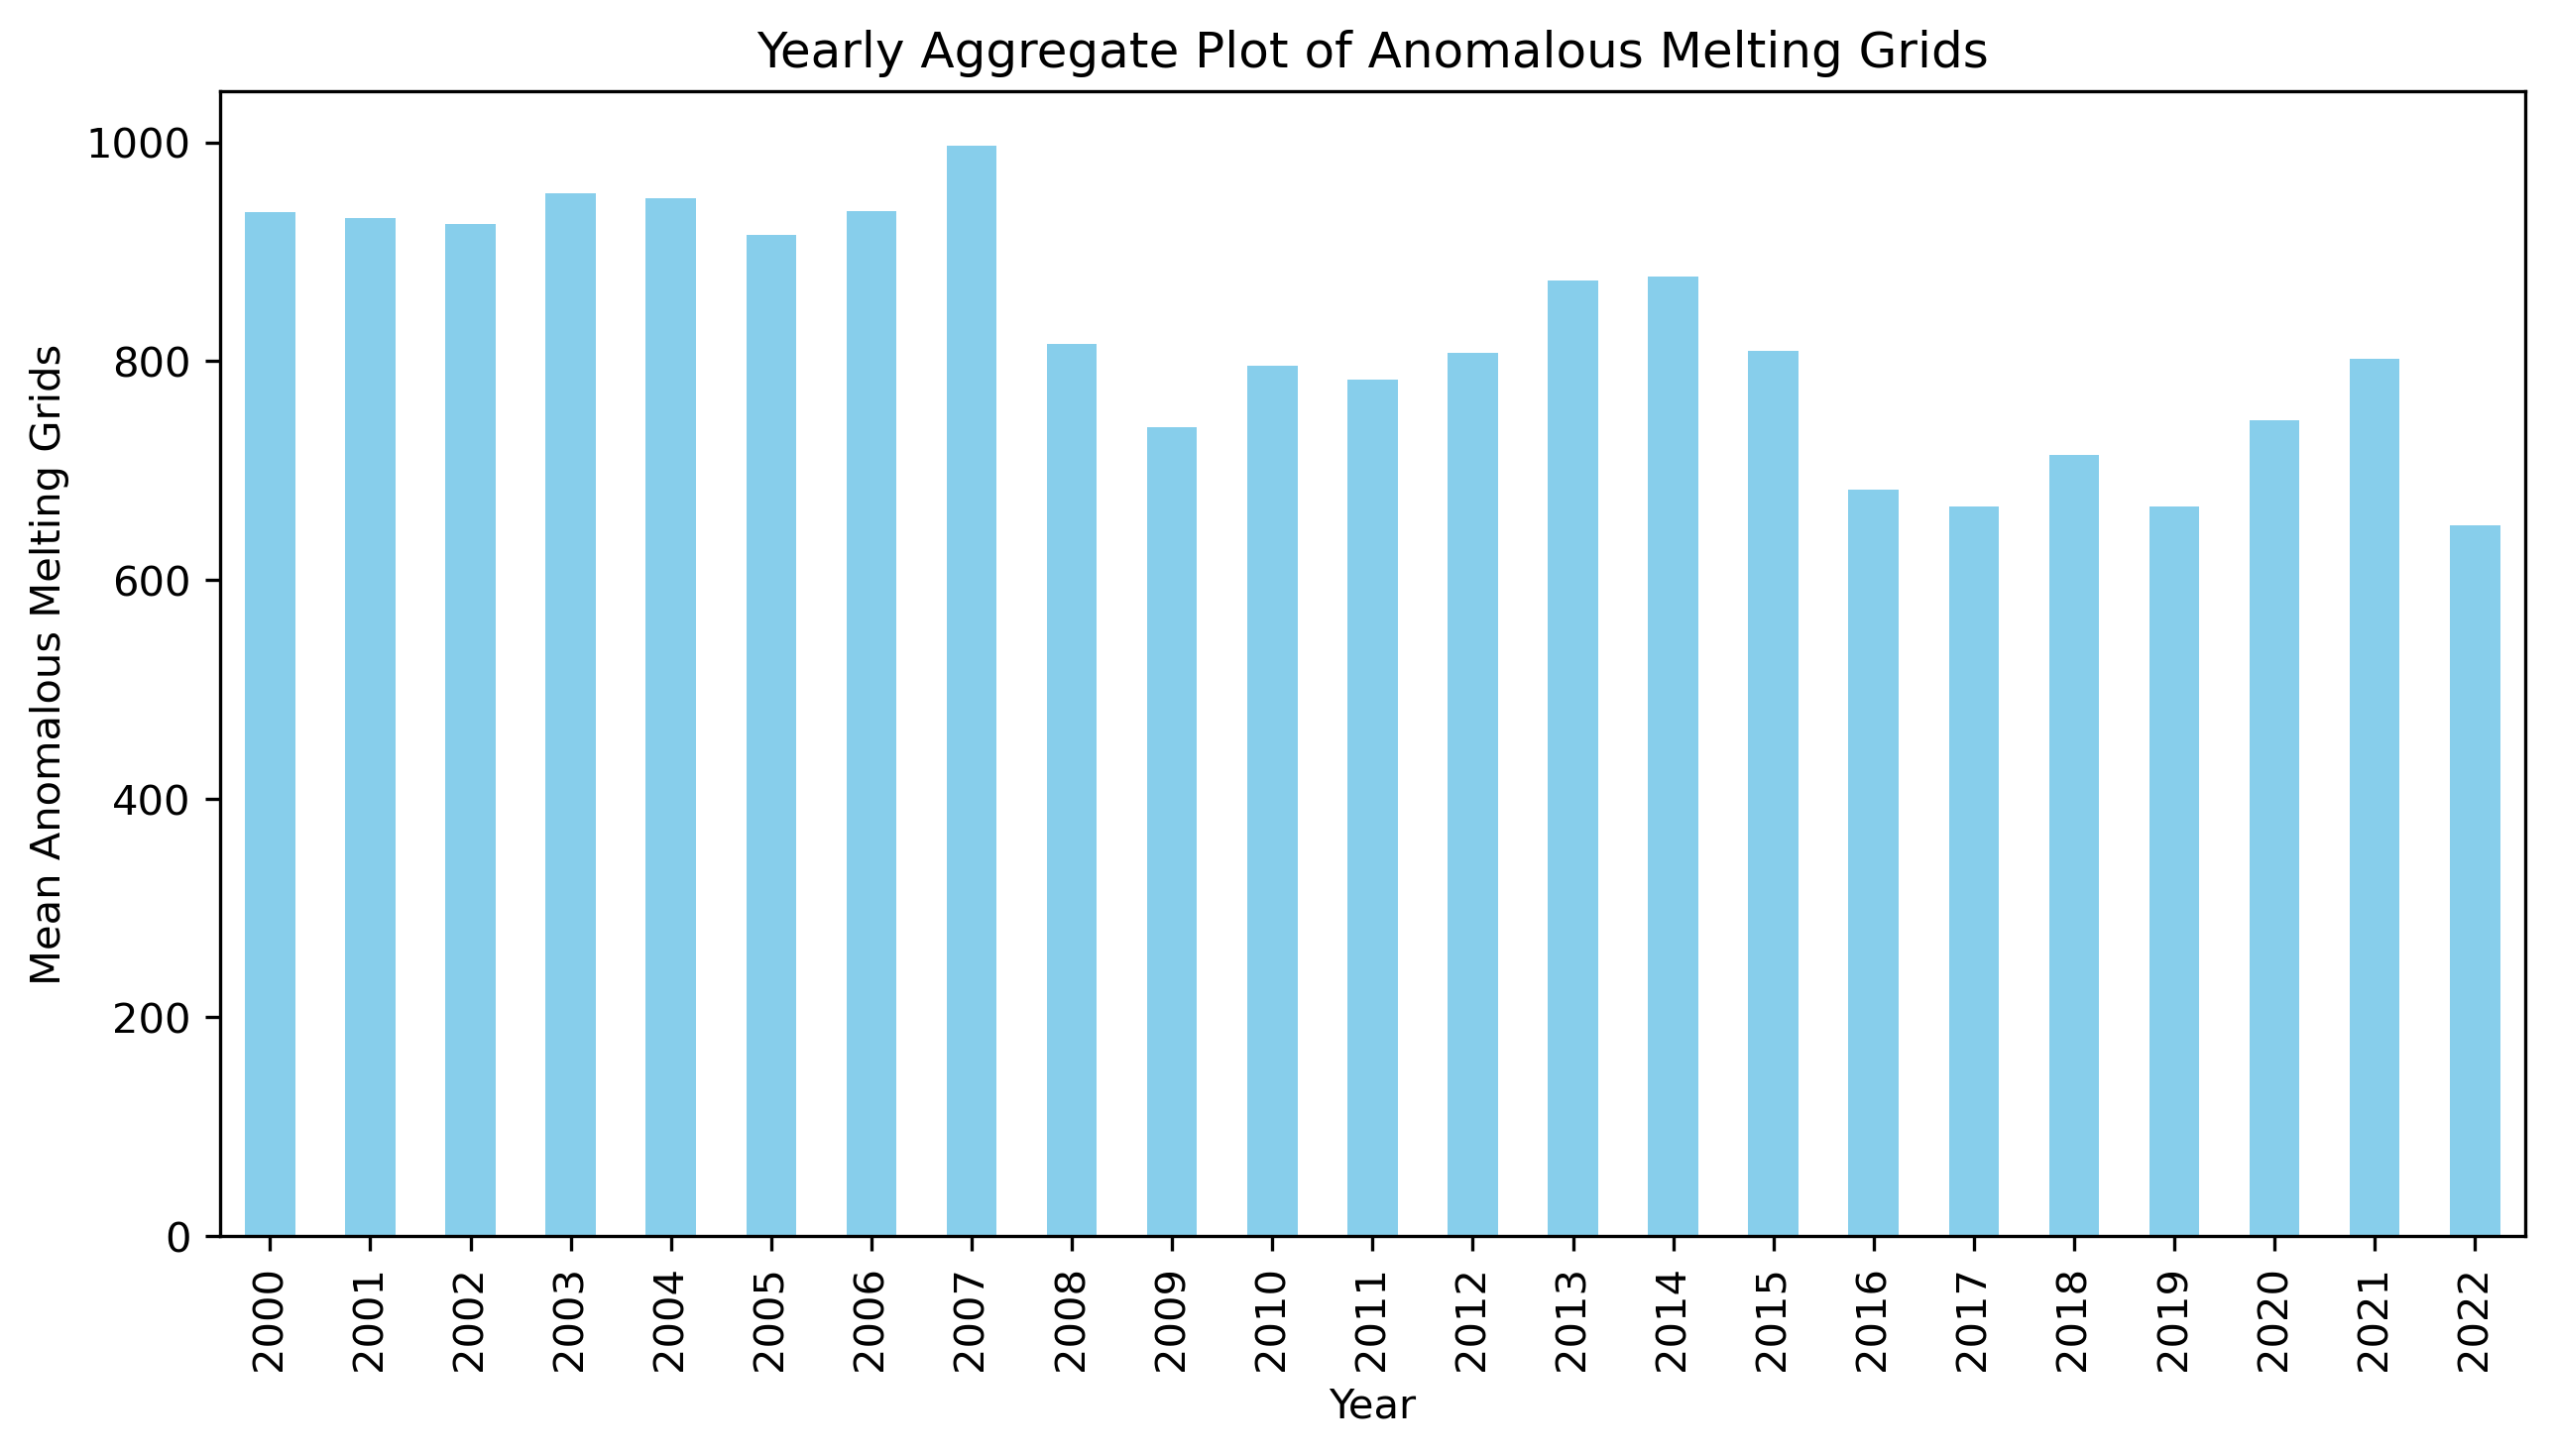

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('anommolus_area_by_date.txt', delimiter='\t')

data1 = {}
data1['Date'] = pd.to_datetime(data['Date'][:], format='%Y%m%d')
data1['Anomalous_Melting_Grids'] = data['Anomoulous melting area'][:]
data1['Year'] = data1['Date'].dt.year
# Convert data1 to a DataFrame
df_data1 = pd.DataFrame(data1)



# Assuming 'data' is your DataFrame with Date and Anomalous Melting Grids columns
plt.figure(figsize=(10, 5))
yearly_aggregate = df_data1.groupby('Year')['Anomalous_Melting_Grids'].mean()  # You can use other aggregate functions like sum
yearly_aggregate.plot(kind='bar', color='skyblue')
plt.title('Yearly Aggregate Plot of Anomalous Melting Grids')
plt.xlabel('Year')
plt.ylabel('Mean Anomalous Melting Grids')

fig = plt.gcf()
fig.set_dpi(300)
plt.show()
